# **Exercise 02: multiclass classification models**

Import necessary *Python* packages:

In [1]:
import sys

Add path to own modules:

In [2]:
sys.path.append("../../src", )

Import necessary entities:

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from numpy import (
    abs,
    sum,
    vstack,
)
from pandas import (
    Series,
    DataFrame,
    concat,
    read_csv,
)

Import own necessary entities:

In [4]:
from plot_utils import draw_top_important_features

Create a dictionary for `read_csv()` method calling:

In [5]:
read_csv_params: dict[str, str | list] = {
    "file": "checker_submits.csv",
    "file_path": "../../data/datasets/",
    "parse_dates": ["timestamp", ],
}

Read the file `checker_submits.csv` to a *Pandas* dataframe:

In [6]:
df: DataFrame = read_csv(
    read_csv_params["file_path"] + read_csv_params["file"],
    parse_dates=read_csv_params["parse_dates"],
)

Check `df` *Pandas* dataframe:

In [7]:
df.head()

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


## Create a *Pandas* dataframe columns: `hour`, `dayofweek`.
## Where `hour` - extracted from the `timestamp` as well as the `dayofweek`.

Create a list `feat_cols` of *Pandas* dataframe features columns:

In [8]:
feat_cols: list[str] = [
    "uid",
    "labname",
    "numTrials",
    "hour",
    "dayofweek",
]

Create `hour` and `dayofweek` *Pandas* dataframe columns:

In [9]:
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek

Take necessary `feat_cols` *Pandas* dataframe columns:

In [10]:
df = df[feat_cols]

Check `df` *Pandas* dataframe:

In [11]:
df.head()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


Create a model of *one-hot* encoder:

In [12]:
oh_encoder_model: OneHotEncoder = OneHotEncoder(sparse_output=False, )

Apply *one-hot* encoder model to categorical data:

In [13]:
encoded_cat_df: DataFrame = DataFrame(
    oh_encoder_model.fit_transform(
        df[["uid", "labname", ]],
    ),
    columns=oh_encoder_model.get_feature_names_out(
        ["uid", "labname", ],
    ),
)

Check `encoded_cat_df` *Pandas* dataframe:

In [14]:
encoded_cat_df.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Concatenate `encoded_cat_df` *Pandas* dataframe with `df` *Pandas* dataframe:

In [15]:
df = concat(
    [
        encoded_cat_df,
        df.drop(
            columns=["uid", "labname", ],
        ),
    ],
    axis=1,
)

Check `df` *Pandas* dataframe:

In [16]:
df.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5,4


Create a model of standart scaler:

In [17]:
std_scaler_model: StandardScaler = StandardScaler()

Apply standart scaler model to the data:

In [18]:
df[["numTrials", "hour", ]] = std_scaler_model.fit_transform(
    df[["numTrials", "hour", ]],
)

Check `df` *Pandas* dataframe:

In [19]:
df.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4


Create `naive_prediction` *Pandas* dataframe column with a value of the most popular class:

In [20]:
df["naive_prediction"] = df["dayofweek"].value_counts().index[0]

Check `df` *Pandas* dataframe:

In [21]:
df.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek,naive_prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4,3


Prepare features and target variables:

In [22]:
X: DataFrame = df.drop(
    columns=["dayofweek", "naive_prediction", ],
)
y: Series = df["dayofweek"]

Check `X` and `y` variables:

In [23]:
X.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352


In [24]:
y.head()

0    4
1    4
2    4
3    4
4    4
Name: dayofweek, dtype: int32

## Find out the accuracy of the naive case:

In [25]:
print(
    "The naive case accuracy is:",
    round(
        accuracy_score(
            df["dayofweek"],
            df["naive_prediction"],
        ),
        3,
    ),
) 

The naive case accuracy is: 0.235


Create a model of *logistic regression*:

In [26]:
log_reg_model: LogisticRegression = LogisticRegression(
    random_state=21,
    fit_intercept=False,
)

Train *logistic regression* model on the data:

In [27]:
log_reg_model.fit(X, y, );

Calculate *logistic regression* model accuracy for the data:

In [28]:
print(
    "The logistic regression model accuracy is:",
    round(
        accuracy_score(
            df["dayofweek"],
            log_reg_model.predict(X, ),
        ),
        3,
    ),
)

The logistic regression model accuracy is: 0.641


Draw a plot for the *logistic regression* model with top `10` most important features:

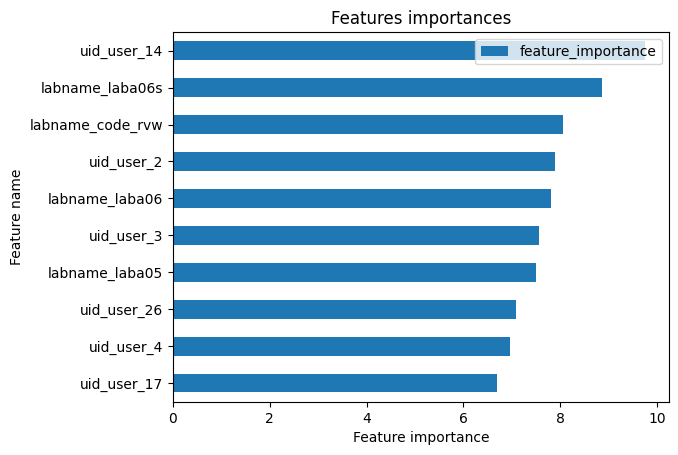

In [29]:
draw_top_important_features(
    log_reg_model.feature_names_in_,
    sum(
        abs(log_reg_model.coef_, ),
        axis=0,
    ),
)

Create a model of *SVC*:

In [30]:
svc_model: SVC = SVC(
    kernel="linear",
    probability=True,
    random_state=21,
)

By default *SVC* uses "one vs one" strategy of the classification.
To calculate importance for a feature you need to use `OneVsRestClassifier` over the *SVC* and sum all the individual feature importances for all the target values:

In [31]:
svc_multi_model: OneVsRestClassifier = OneVsRestClassifier(svc_model, )

Train *SVC* model on the data:

In [32]:
svc_multi_model.fit(X, y, );

Calculate *SVC* model accuracy for the data:

In [33]:
print(
    "The SVC model accuracy is:",
    round(
        accuracy_score(
            df["dayofweek"],
            svc_multi_model.predict(X, ),
        ),
        3,
    ),
)

The SVC model accuracy is: 0.612


Create a dictionary with differents *SVC* model kernels:

In [34]:
svc_kernels: dict[str, float] = {
    "rbf": 0.0,
    "poly": 0.0,
    "linear": 0.0,
    "sigmoid": 0.0,
}

Try differents *SVC* model kernels:

In [35]:
for svc_kernel in svc_kernels.keys():
    loc_svc_model: SVC = SVC(
        probability=True,
        random_state=21,
        kernel=svc_kernel,
    )
    loc_svc_multi_model: OneVsRestClassifier = OneVsRestClassifier(
        loc_svc_model,
    )

    loc_svc_model.fit(X, y, )

    svc_kernels[svc_kernel] = round(
        accuracy_score(
            df["dayofweek"],
            loc_svc_model.predict(X, ),
        ),
        3,
    )

Find the best *SVC* model kernel:

In [36]:
print(
    f"The best SVC model kernel is:",
    max(
        svc_kernels,
        key=lambda svc_kernel: svc_kernel[1],
    ),
)

The best SVC model kernel is: poly


Draw a plot for the *SVC* model with top `10` most important features for the `linear` kernel:

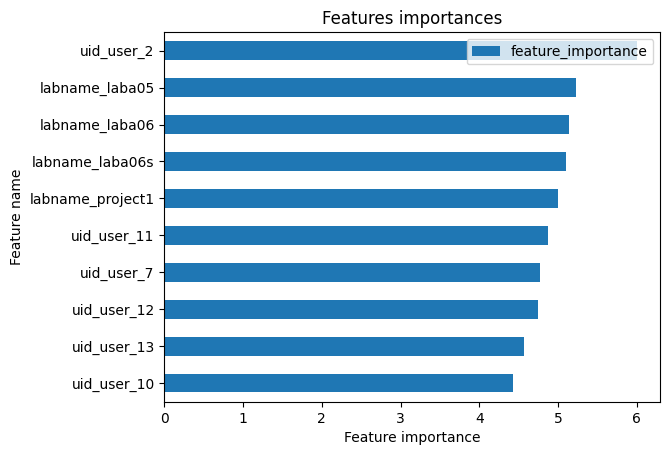

In [37]:
draw_top_important_features(
    svc_multi_model.estimators_[0].feature_names_in_,
    sum(
        abs(
            vstack([
                estimator.coef_
                for estimator
                in svc_multi_model.estimators_
            ], ),
        ),
        axis=0,
    ),
)

Create a model of *decision tree*:

In [38]:
tree_model: DecisionTreeClassifier = DecisionTreeClassifier(
    max_depth=4,
    random_state=21,
)

Train *decision tree* model on the data:

In [39]:
tree_model.fit(X, y, );

Calculate *decision tree* model accuracy for the data:

In [40]:
print(
    "The decision tree model accuracy is:",
    round(
        accuracy_score(
            df["dayofweek"],
            tree_model.predict(X, ),
        ),
        3,
    ),
)

The decision tree model accuracy is: 0.552


Create a dictionary with differents *decision tree* model `max_depth` parameter values:

In [41]:
max_depths: dict[int, float] = {max_depth: 0.0 for max_depth in range(2, 21, )}

Try differents *decision tree* model `max_depth` parameter values:

In [42]:
for max_depth in max_depths:
    loc_tree_model: DecisionTreeClassifier = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=21,
    )

    loc_tree_model.fit(X, y, )

    max_depths[max_depth] = round(
        accuracy_score(
            df["dayofweek"],
            loc_tree_model.predict(X, ),
        ),
        3,
    )

Find the best *decision tree* model `max_depth` parameter value:

In [43]:
print(
    f"The best decision tree model `max_depth` parameter value is:",
    max(
        max_depths.items(),
        key=lambda max_depth: max_depth[1],
    )[0],
)

The best decision tree model `max_depth` parameter value is: 20


Draw a plot for the *decision tree* model with top `10` most important features:

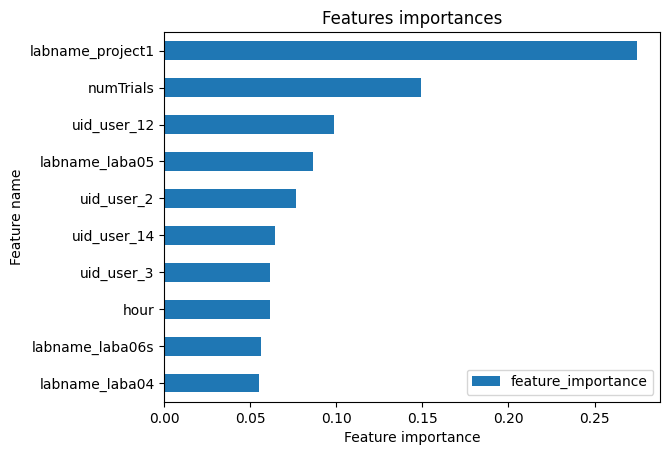

In [44]:
draw_top_important_features(
    tree_model.feature_names_in_,
    tree_model.feature_importances_,
)

## *Random forest* is a set of individual *decision tree*s.

Create a model of *random forest*:

In [45]:
forest_tree_model: RandomForestClassifier = RandomForestClassifier(
    max_depth=25,
    random_state=21,
    n_estimators=100,
)

Train *random forest* model on the data:

In [46]:
forest_tree_model.fit(X, y, );

Calculate *random forest* model accuracy for the data:

In [47]:
print(
    "The random forest model accuracy is:",
    round(
        accuracy_score(
            df["dayofweek"],
            forest_tree_model.predict(X, ),
        ),
        3,
    ),
)

The random forest model accuracy is: 0.999


Create a list with differents *random forest* model `max_depth` parameter values:

In [48]:
max_depths: list[int] = [max_depth for max_depth in range(2, 20, )]

Create a list with differents *random forest* model `n_estimators` parameter values:

In [49]:
n_estimators: list[int] = [
    curr_n_estimators
    for curr_n_estimators
    in range(30, 300, 10, )
]

Try differents *random forest* model values of parameters:

In [50]:
best_max_depth_val: int = 0
best_n_estimators_val: int = 0
best_accuracy_val: float = 0.0

for max_depth in max_depths:
    for curr_n_estimators in n_estimators:
        loc_forest_tree_model: RandomForestClassifier = RandomForestClassifier(
            n_estimators=curr_n_estimators,
            max_depth=max_depth,
            random_state=21,
        )

        loc_forest_tree_model.fit(X, y, )

        loc_accuracy_val: float = round(
            accuracy_score(
                df["dayofweek"],
                loc_forest_tree_model.predict(X, ),
            ),
            3,
        )

        if loc_accuracy_val > best_accuracy_val:
            best_max_depth_val = max_depth
            best_accuracy_val = loc_accuracy_val
            best_n_estimators_val = curr_n_estimators

Find the best *random forest* model parameters values:

In [51]:
print(
    "The best random forest model parameters are:",
    "\nThe best `max_depth` is:",
    best_max_depth_val,
    "\nThe best `n_estimators` is:",
    best_n_estimators_val,
    "\nThe best accuracy value is:",
    best_accuracy_val,
)

The best random forest model parameters are: 
The best `max_depth` is: 19 
The best `n_estimators` is: 290 
The best accuracy value is: 0.997


Draw a plot for the *random forest* model with top `10` most important features:

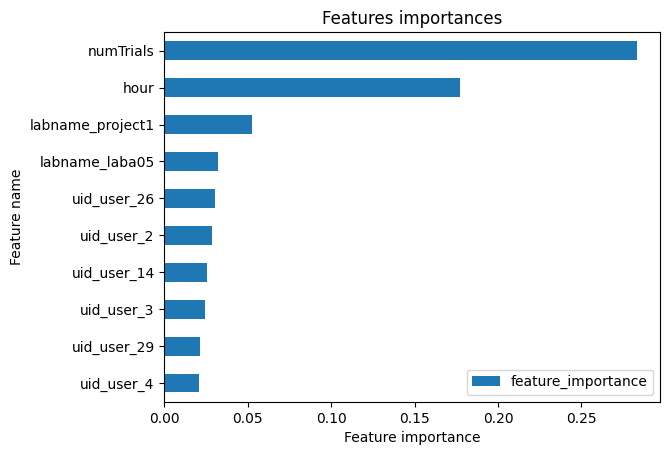

In [52]:
draw_top_important_features(
    forest_tree_model.feature_names_in_,
    forest_tree_model.feature_importances_,
)

Check `df` *Pandas* dataframe:

In [53]:
df.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek,naive_prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4,3


Create a dictionary for `to_csv()` method calling:

In [54]:
to_csv_params: dict[str, str] = {
    "file": "dayofweek.csv",
    "file_path": "../../data/datasets/",
}

## Save the `df` *Pandas* dataframe as `dayofweek.csv`:

In [55]:
df.to_csv(to_csv_params["file_path"] + to_csv_params["file"], )